# Regresi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def estimase_coeff(x,y):
    #determine number of observation/point
    n=np.size(x)
    ##Menghitung slope (B1)
    #menghitung mean vektor x dan y
    m_x, m_y=np.mean(x), np.mean(y)
    #menghitung menggunakan rumus
    SS_xy = np.sum(y*x)-n*m_y*m_x
    SS_xx = np.sum(x*x)-n*m_x*m_x
    #Calculate coefficients
    b_1=SS_xy/SS_xx
     ##Menghitung intercept (B0)
    b_0=m_y-b_1*m_x
    return (b_0,b_1)

In [3]:
def plot_regression_line(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    
    #predicted
    y_pred=b[0]+b[1]*x
    
    #plot predicted line
    plt.plot(x,y_pred,color='g')
    
    #label
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()  
    

Estimated Coefficients : 
b_0=1.2363636363636363 
b_1=1.1696969696969697


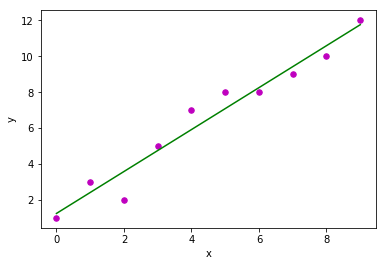

In [4]:
def main():
    x=np.array([0,1,2,3,4,5,6,7,8,9])
    y=np.array([1,3,2,5,7,8,8,9,10,12])
    
    # estimate coefficient
    b = estimase_coeff(x,y)
    print('Estimated Coefficients : \nb_0={} \nb_1={}'.format(b[0],b[1]))
    
    # plot
    plot_regression_line(x,y,b)
    
if __name__=="__main__":
    main()

# ---------------------------------------------------------------------------------------------------------

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [51]:
df.shape

(200, 4)

In [52]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


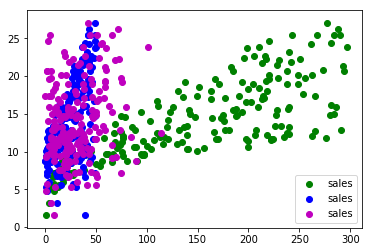

In [59]:
plt.scatter(df['TV'],df['sales'],color='g')
plt.scatter(df['radio'],df['sales'],color='b')
plt.scatter(df['newspaper'],df['sales'],color='m')
plt.legend()
plt.show()


Yang linear kuat TV dan Radio

In [68]:
lm=smf.ols(formula='sales~TV',data=df).fit()

In [69]:
#munculin koeffisien
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Interpretasi B1 : setiap terjadi satu kenaikan iklan dari tv maka sales naik 0.047537

Interpretasi B0 : jika tidak ada perubahan unit iklan tv maka sales sama dengan 7.032594


In [71]:
x_new=pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [77]:
lm.predict(x_new)

0    9.409426
dtype: float64

Jadi nilai sales y adalah 9.409426

In [103]:
x_new2=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new2

,TV
0,0.7
1,296.4


In [104]:
lm.predict(x_new2)

0     7.065869
1    21.122454
dtype: float64

In [105]:
lm.rsquared

0.611875050850071

In [106]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Interval konfidensi untuk intercept dan TV

In [108]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.47e-42
Time:                        13:05:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
lm2=smf.ols(formula='sales~radio',data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 28 May 2018   Prob (F-statistic):           4.35e-19
Time:                        13:11:27   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
lm2=smf.ols(formula='sales~newspaper',data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 28 May 2018   Prob (F-statistic):            0.00115
Time:                        13:11:50   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# --------------------------------------------------------------------------------------------------------

# Multiple Regression

In [112]:
lm=smf.ols(formula='sales~TV+radio',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 28 May 2018   Prob (F-statistic):           4.83e-98
Time:                        13:18:05   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.58e-96
Time:                        13:21:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kalau comaper multiple pakai adjusted R square.

kalau nilainya lebih tinggi maka model lebih akurat.

Uji F test, menguji signifikasnsi model tersebut. (ada minimal 1 var xi yang berpengaruh terhadap y). bisa langsung di cek dari pvalue

Durbin-Watson mengecek apakah ada autocorellation dalam regresi, kalau angkanya mendekati nilai 2 maka data tersebut tidak ada auto cerllation, berarti modelnya valid


Jarque-Bera (JB) untuk melakukan uji normalitas dalam hal ini error, diperhatikan prob(JB) adalah pvalue

In [130]:
import sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [131]:
y=df.sales
feature_cols=['TV','radio','newspaper']
x=df[feature_cols]

In [132]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
print(lm.intercept_)

2.9388893694594067


In [135]:
print(lm.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [137]:
print(lm.score)
#untuk mencari R square

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [150]:
#set a seed
np.random.seed(12345)
nums=np.random.rand(len(df))
mask_large=nums > 0.5

In [152]:
df['Size']='small'
df.loc[mask_large,'Size']='large'
df.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


kategorikal variabel harus di convert ke numerik menggunakan dummy variabels

In [153]:
df['IsLarge']=df.Size.map({'small':0,'large':1})

In [155]:
df.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [160]:
feature_cols=['TV','radio','newspaper','IsLarge']
x=df[feature_cols]
y=df.sales

In [161]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
print(lm.intercept_)

2.9117013282568553


In [163]:
print(lm.coef_)

[ 0.04571982  0.18872814 -0.00109768  0.05742385]


interpretasi nilai koeffiesien untuk 2 variabel dummy

ketika kita berada di size yang large rata-rata kenaikan sales sebesar 0.05742 lebih besar dari pada di size small

In [165]:
np.random.seed(123456)
nums=np.random.rand(len(df))
mask_suburban=(nums > 0.333) & (nums <= 0.666)

In [167]:
df['Area']='rural'
df.loc[mask_suburban,'Area']='suburban'
df.loc[nums>0.666,'Area']='urban'
df.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [177]:
df2=df[['TV','radio','newspaper','sales','Area']]
#buat 3 dummy variabel tapi exclude column variabel dummy pertama (rural)
area_dummies=pd.get_dummies(df2.Area,prefix='Area').iloc[:,1:]

#kalau tidak ada urutan tidak boleh membuat urutan 0 rural, suburban 1 dan urban 2.

In [178]:
data=pd.concat([df2,area_dummies],axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,rural,0,0
2,44.5,39.3,45.1,10.4,urban,0,1
3,17.2,45.9,69.3,9.3,rural,0,0
4,151.5,41.3,58.5,18.5,urban,0,1
5,180.8,10.8,58.4,12.9,suburban,1,0


rural tidak dibuat kolom karena dia basisnya

In [186]:
feature_cols=['TV','radio','newspaper','Area_suburban','Area_urban']
x=data[feature_cols]
y=data.sales

In [187]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
print(lm.intercept_)

2.9245608427692105


In [189]:
print(lm.coef_)

[ 0.04577654  0.18765617 -0.0010641  -0.11823984  0.25944128]


interpretasi nilai koeffiesien untuk 3 variabel dummy

ketika kita berada di area suburban rata-rata penurunan sales sebesar 0.11823984 lebih kecil dari pada di area rural 

ketika kita berada di area suburban rata-rata kenaikan sales sebesar 0.25944128 lebih besar dari pada di area rural